# Newer Datasets Related to Startup Profitability

## 1. Startup Success Prediction

### Overview
This dataset helps predict the success or failure of startup companies based on various features such as funding rounds, industry type, milestones, location, and investor involvement. It contains detailed information on over 48,000 startups.

### Features

- **funding_rounds**: Number of funding rounds (Numeric)
- **funding_total_usd**: Total amount of funding received in USD (Numeric)
- **milestones**: Number of major company milestones (Numeric)
- **category_code**: Industry category (Categorical: software, ecommerce, biotech, etc.)
- **has_VC**: Whether the startup has venture capital investment (Binary)
- **has_angel**: Whether the startup has angel investment (Binary)
- **has_roundA**, **has_roundB**, **has_roundC**, **has_roundD**: Indicators for having each round of funding (Binary)
- **is_CA**, **is_NY**, **is_MA**, **is_TX**, **is_otherstate**: Location flags based on U.S. state (Binary)
- **avg_participants**: Average number of participants per funding round (Numeric)
- **age_first_funding_year**, **age_last_funding_year**: Age of the startup at first/last funding (Numeric)
- **age_first_milestone_year**, **age_last_milestone_year**: Age of the startup at first/last milestone (Numeric)

### Target

- **status**: Final outcome of the startup  
  - `acquired` = Success  
  - `closed` = Failure  


### Dataset Summary

- **Number of rows**: ~923
- **Number of features**: 49


### Dataset Link

[Startup Success Prediction on Kaggle](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
from plotly.offline import iplot, init_notebook_mode
from tabulate import tabulate
import plotly.io as pio  # required for saving images
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Step 1: Load the Data
df = pd.read_csv("/home/ccp/Desktop/LR/archive/Startup_data.csv")
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [4]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


### Time intervals

In [5]:
date_cols = [col for col in df.columns if col.endswith('_at')]
print("Date-related columns found:", date_cols)

# Convert to datetime and print min/max dates
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    min_date = df[col].min()
    max_date = df[col].max()
    print(f"{col}: {min_date.date() if pd.notnull(min_date) else 'N/A'} → {max_date.date() if pd.notnull(max_date) else 'N/A'}")


Date-related columns found: ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']
founded_at: 1984-01-01 → 2013-04-16
closed_at: 2001-01-01 → 2013-10-30
first_funding_at: 2000-01-01 → 2013-11-20
last_funding_at: 2001-01-01 → 2013-11-20


### Missing values handling

In [6]:
try:
    use_tabulate = True
except ImportError:
    use_tabulate = False

# Create a null summary
nulls = []
for col in df.columns:
    if df[col].isnull().any():
        nullperc = df[col].isnull().sum() / len(df) * 100
        nulls.append([col, round(nullperc, 3), df[col].isnull().sum()])

# Display results
if nulls:
    null_df = pd.DataFrame(nulls, columns=["Column", "Missing %", "Missing Count"])
    if use_tabulate:
        print(tabulate(null_df, headers='keys', tablefmt='fancy_grid', showindex=False))
    else:
        print(null_df.to_string(index=False))
else:
    print("No missing values found in the dataset!")


╒══════════════════════════╤═════════════╤═════════════════╕
│ Column                   │   Missing % │   Missing Count │
╞══════════════════════════╪═════════════╪═════════════════╡
│ Unnamed: 6               │      53.413 │             493 │
├──────────────────────────┼─────────────┼─────────────────┤
│ closed_at                │      63.705 │             588 │
├──────────────────────────┼─────────────┼─────────────────┤
│ age_first_milestone_year │      16.468 │             152 │
├──────────────────────────┼─────────────┼─────────────────┤
│ age_last_milestone_year  │      16.468 │             152 │
├──────────────────────────┼─────────────┼─────────────────┤
│ state_code.1             │       0.108 │               1 │
╘══════════════════════════╧═════════════╧═════════════════╛


In [ ]:


# Generate missing data heatmap using Plotly
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Values']
missing_data['Missing %'] = ((missing_data['Missing Values'] / df.shape[0]) * 100).round(2)

fig = px.bar(missing_data, x='Column', y='Missing %', title='Missing Data Percentage per Feature', 
             labels={'Missing %': 'Percentage of Missing Data'}, 
             color='Missing %', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title="Feature", yaxis_title="Percentage of Missing Data", 
                  xaxis_tickangle=-45, showlegend=False)
fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/images/plot1.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot1.png)

In [33]:
df.drop(['Unnamed: 6','state_code.1','zip_code','id','Unnamed: 0','object_id','state_code'],axis = 1,inplace = True)

In [34]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['closed_at'] = pd.to_datetime(df['closed_at'], errors='coerce')

df = df[~(df['closed_at'] < df['founded_at'])]

In [35]:
reference_date = pd.to_datetime('2025-01-01')
df['closed_at_days_since'] = (reference_date - df['closed_at']).dt.days
df['closed_at_days_since'] = df['closed_at_days_since'].fillna(-1)  

In [36]:
lst = ['age_first_milestone_year', 'age_last_milestone_year']
df[lst] = df[lst].fillna(0)

# Insights

# 1. Target Distribution: Success or Failure?

In [ ]:
fig = px.pie(df, names='status', title='Startup Success vs. Failure', 
             color='status', color_discrete_map={'closed': 'red', 'acquired': 'green'})
fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/images/plot2.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot2.png)

 # 2.Funding Total vs Success: Does More Funding Mean More Success?

In [ ]:
import plotly.express as px

fig = px.strip(df, x='status', y='funding_total_usd', color='status',
               hover_data=['name', 'category_code'],
               title='Funding vs Startup Status (Strip Plot)',
               labels={'funding_total_usd': 'Total Funding (USD)', 'status': 'Startup Status'})

fig.update_traces(jitter=0.4, marker=dict(size=8, opacity=0.7, line=dict(width=0.5, color='black')))
fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/images/plot3.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot3.png)

In [ ]:
# Define the boxplots for each status group
acquired_box = go.Box(
    y=df[df['status'] == 'acquired']['funding_total_usd'],
    name='Acquired',
    marker=dict(color='blue'),
    boxpoints='outliers',  # show outliers
    jitter=0.3,
    pointpos=-1.8
)

closed_box = go.Box(
    y=df[df['status'] == 'closed']['funding_total_usd'],
    name='Closed',
    marker=dict(color='red'),
    boxpoints='outliers',
    jitter=0.3,
    pointpos=-1.8
)

# Layout settings
layout = go.Layout(
    title='Total Funding by Startup Status (Interactive Boxplot)',
    yaxis=dict(title='Total Funding (USD)', type='log'),  # log scale
    xaxis=dict(title='Startup Status'),
    showlegend=False
)

# Create the figure and assign it to a variable
fig4 = go.Figure(data=[acquired_box, closed_box], layout=layout)

# Display interactive plot
iplot(fig4)

# Save static image
fig4.write_image("/home/ccp/Desktop/LR/archive/images/plot4.png")


![Plot](/home/ccp/Desktop/LR/archive/images/plot4.png)

# 3.Industry Insights: What Industries Have More Successful Startups?

In [ ]:
fig = px.sunburst(df, path=['category_code', 'status'], title='Industry Distribution by Success/Failure',
                  color='status', color_discrete_map={'closed': 'red', 'acquired': 'green'})
fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/images/plot5.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot5.png)

# 4. Age vs. Success: Is Experience a Factor?

In [ ]:
fig = px.violin(df, y='age_first_funding_year', x='status', color='status', box=True, 
                points="all", title='Age of Startup vs Success/Failure', 
                labels={'age_first_funding_year': 'Age at First Funding', 'status': 'Startup Status'})
fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/images/plot6.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot6.png)

# 5.Funding Rounds and Investor Type: How Do These Influence Success?

In [17]:

z_scores = np.abs(stats.zscore(df['funding_total_usd']))
df_clean = df[z_scores < 3] 

In [ ]:
#log-transform to handle skewed data
df_clean['log_funding_total'] = np.log1p(df_clean['funding_total_usd'])  # log(1 + x)

fig = px.scatter(
    df_clean,
    x='funding_rounds',
    y='log_funding_total',
    color='status',
    size='funding_total_usd',
    hover_name='name',
    hover_data=['category_code', 'funding_total_usd'],
    title='🚀 How Do Funding Rounds Relate to Startup Success?',
    labels={
        'funding_rounds': 'Number of Funding Rounds',
        'log_funding_total': 'Log of Total Funding (USD)',
        'status': 'Startup Outcome'
    },
    template='plotly_white',
    color_discrete_map={
        'acquired': '#28a745',  # green
        'closed': '#dc3545',    # red
        'operating': '#007bff'  # blue
    }
)

fig.update_traces(
    marker=dict(
        opacity=0.7,
        line=dict(width=1, color='DarkSlateGrey')
    )
)

fig.update_layout(
    legend_title_text='Startup Status',
    xaxis=dict(title='Number of Funding Rounds', tick0=0, dtick=1),
    yaxis=dict(title='Log(Total Funding USD)', showgrid=True),
    title_x=0.1
)

fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/images/plot7.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot7.png)

In [19]:
import pandas as pd
import plotly.express as px

startup_timeline = df.copy()
startup_timeline['founded_year'] = pd.to_datetime(startup_timeline['founded_at'], errors='coerce').dt.year

# Define all possible statuses
all_statuses = ['acquired', 'closed']
all_years = sorted(startup_timeline['founded_year'].dropna().unique())

# Group and reindex
grouped = (
    startup_timeline.groupby(['founded_year', 'status'])
    .size()
    .reset_index(name='count')
    .pivot(index='founded_year', columns='status', values='count')
    .reindex(index=all_years, columns=all_statuses, fill_value=0)
    .reset_index()
    .melt(id_vars='founded_year', var_name='status', value_name='count')
)

# Plot
fig = px.bar(
    grouped, 
    x='status', 
    y='count', 
    color='status', 
    animation_frame='founded_year',
    title='📊 Startup Outcome Over Time',
    labels={'status': 'Startup Status', 'count': 'Number of Startups'},
    color_discrete_map={'acquired': 'green', 'closed': 'red'},
    template='plotly_white'
)
fig.update_layout(
    xaxis_title='Startup Status',
    yaxis_title='Startup Count',
    title_x=0.05
)
fig.show()
fig.write_image("/home/ccp/Desktop/LR/archive/pic/plot8.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot8.png)

# 6.Do startups with VC funding succeed more often than those without?

In [20]:


import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.io as pio  # for saving image

# Group and pivot the data
vc_group = df.groupby(['has_VC', 'status']).size().reset_index(name='count')
vc_pivot = vc_group.pivot(index='has_VC', columns='status', values='count').fillna(0)

# Create bar traces
trace1 = go.Bar(name='Acquired', x=['No VC', 'Has VC'], y=vc_pivot.get('acquired', [0, 0]))
trace2 = go.Bar(name='Closed',   x=['No VC', 'Has VC'], y=vc_pivot.get('closed', [0, 0]))
# If you want to include operating startups:
# trace3 = go.Bar(name='Operating', x=['No VC', 'Has VC'], y=vc_pivot.get('operating', [0, 0]))

# Create layout
layout = go.Layout(
    title='💰 Impact of VC Funding on Startup Success',
    barmode='stack',
    xaxis=dict(title='VC Funding'),
    yaxis=dict(title='Number of Startups')
)

# Create figure
fig9 = go.Figure(data=[trace1, trace2], layout=layout)

# Show interactive plot (in Jupyter)
iplot(fig9)

# Save static image
fig9.write_image("/home/ccp/Desktop/LR/archive/pic/plot9.png")


![Plot](/home/ccp/Desktop/LR/archive/images/plot9.png)

# 7. Which cities produce the most successful startups?

In [38]:
top_cities = df[df['status'] == 'acquired']['city'].value_counts().nlargest(10)

trace = go.Bar(x=top_cities.index, y=top_cities.values,
               marker=dict(color='green'))

layout = go.Layout(title='🌆 Top 10 Cities by Acquired Startups',
                   xaxis=dict(title='City'), yaxis=dict(title='Number of Acquired Startups'))
fig10=go.Figure(data=[trace], layout=layout)
iplot(fig10)
fig10.write_image("/home/ccp/Desktop/LR/archive/pic/plot9b.png")

![Plot](/home/ccp/Desktop/LR/archive/images/plot9b.png)

# 8.Which tech sub-industries get the most funding?

In [22]:
categories = ['is_software', 'is_web', 'is_mobile', 'is_enterprise', 
              'is_advertising', 'is_gamesvideo', 'is_ecommerce', 
              'is_biotech', 'is_consulting']

funding_data = []
for cat in categories:
    total = df[df[cat] == 1]['funding_total_usd'].sum()
    funding_data.append({'category': cat.replace('is_', ''), 'funding': total})

funding_df = pd.DataFrame(funding_data).sort_values(by='funding', ascending=False)

trace = go.Bar(x=funding_df['category'], y=funding_df['funding'], marker=dict(color='teal'))

layout = go.Layout(title='💸 Total Funding by Tech Sub-Industry',
                   xaxis=dict(title='Sub-Industry'), yaxis=dict(title='Total Funding (USD)'))
fig11=go.Figure(data=[trace], layout=layout)
iplot(fig11)
fig11.write_image("/home/ccp/Desktop/LR/archive/pic/plot11.png")



![Plot](/home/ccp/Desktop/LR/archive/images/plot11.png)

# Detecting and Treating Outliers 


In [23]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_counts[col] = outliers
    return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outliers (IQR)'])

iqr_outliers = detect_outliers_iqr(df)
print(iqr_outliers.sort_values(by='Outliers (IQR)', ascending=False))


                          Outliers (IQR)
has_roundC                           214
is_otherstate                        204
is_top500                            175
is_software                          153
is_web                               144
is_NY                                105
has_roundD                            91
is_MA                                 83
is_mobile                             79
latitude                              78
is_enterprise                         73
funding_total_usd                     65
is_advertising                        60
relationships                         60
is_gamesvideo                         52
is_TX                                 42
is_biotech                            34
avg_participants                      27
is_ecommerce                          24
age_first_funding_year                20
age_first_milestone_year              20
funding_rounds                        16
age_last_funding_year                 12
age_last_milesto

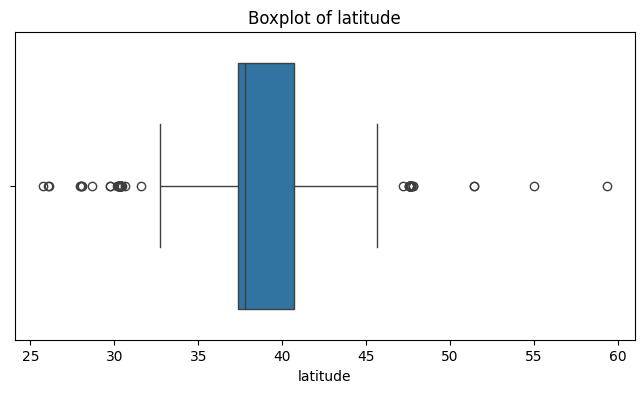

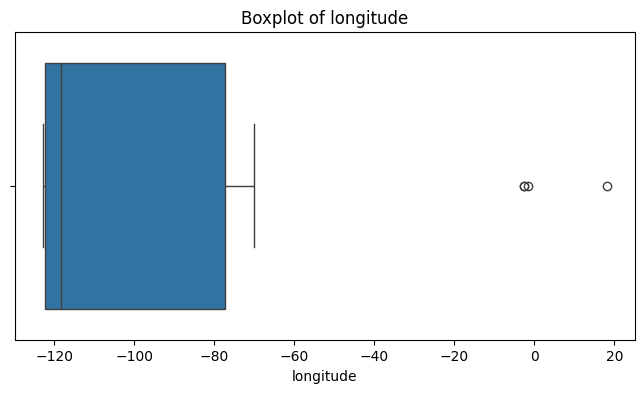

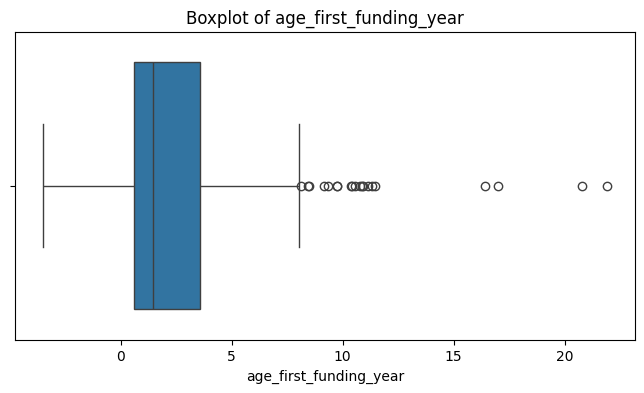

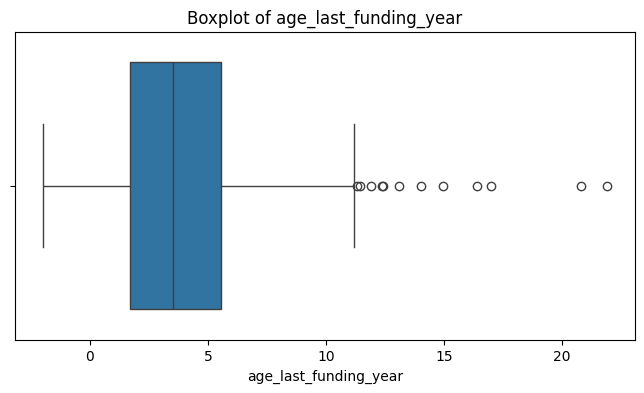

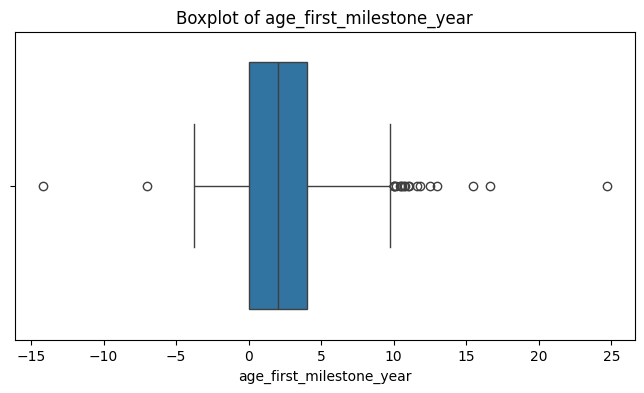

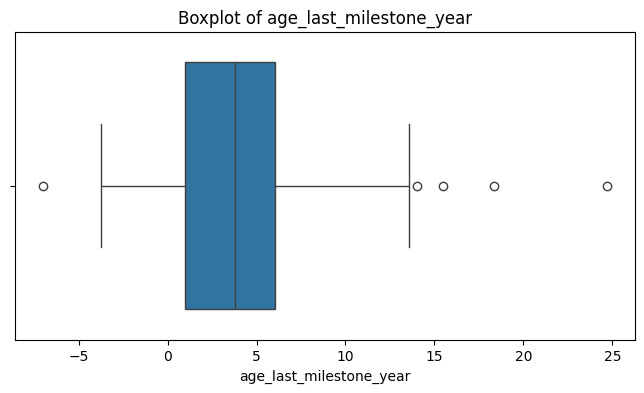

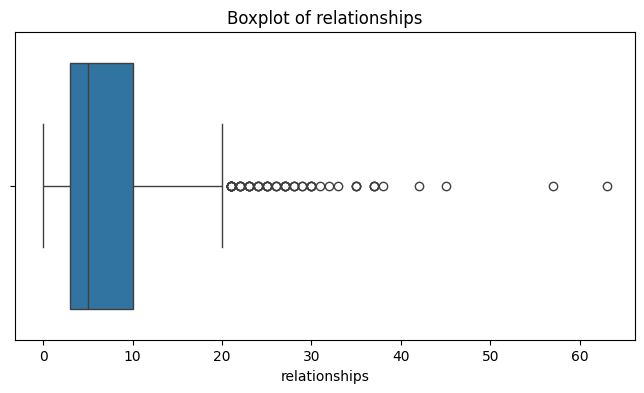

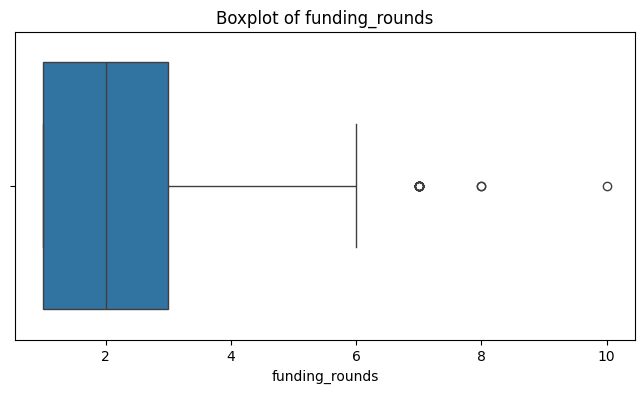

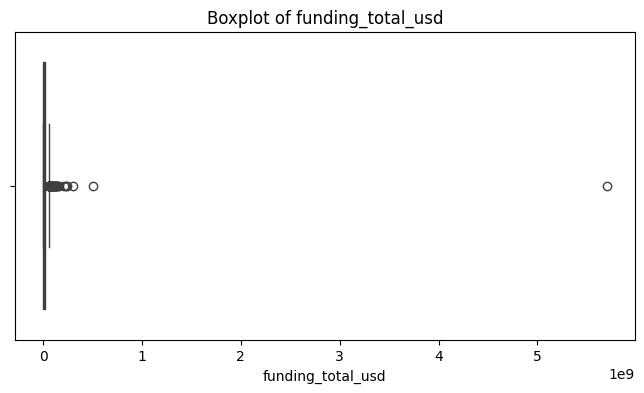

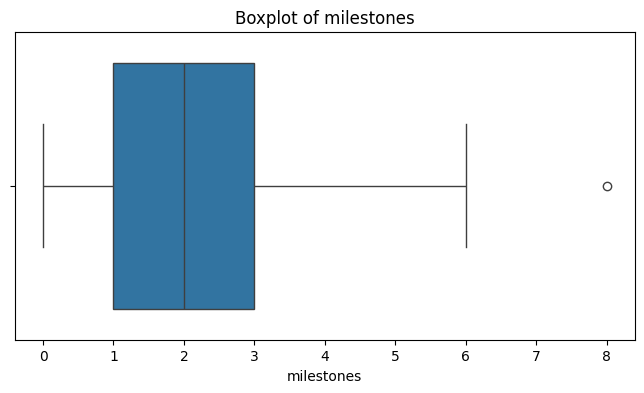

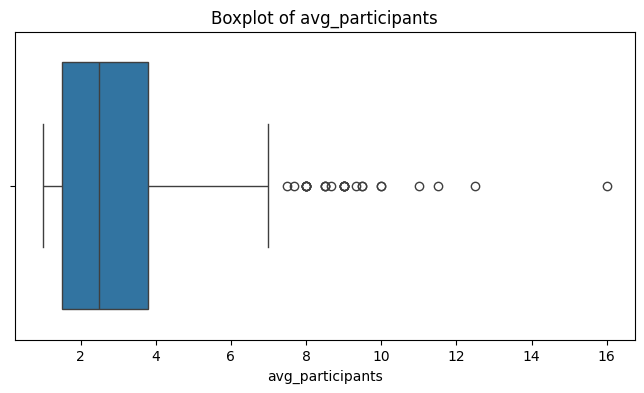

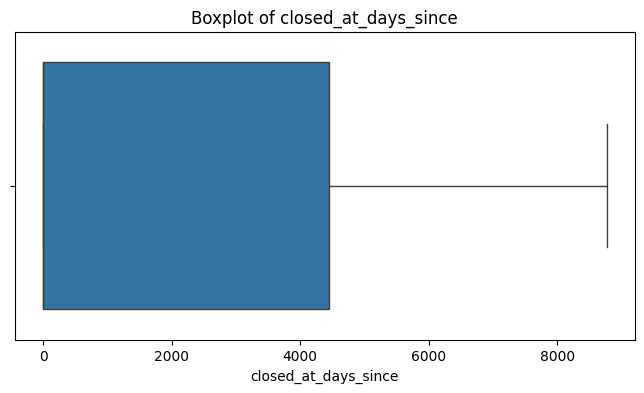

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols=['latitude', 'longitude','age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones','avg_participants','closed_at_days_since']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
for col in ['funding_total_usd', 'avg_participants', 'relationships']:
    cap = df[col].quantile(0.99) #What value is higher than 99% of all the values in this column?
    df[f'{col}_capped'] = np.where(df[col] > cap, cap, df[col])
    df[f'{col}_log'] = np.log1p(df[f'{col}_capped'])
    

In [26]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

df = remove_outliers_iqr(df, 'milestones')

In [27]:
df.drop(['funding_total_usd', 'funding_total_usd_capped'], axis=1, inplace=True)


In [28]:
df['status'] = df['status'].apply(lambda x: 1 if x == 'acquired' else 0)


In [29]:
df.to_csv("clean_data.csv")